In [2]:
import torch
from torchvision.models import resnet18, ResNet18_Weights

In [3]:
model = resnet18(weights = ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 384MB/s]


In [4]:
labels.device

device(type='cpu')

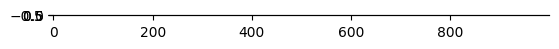

In [5]:
import matplotlib.pyplot as plt
plt.imshow(labels)
plt.show()

In [6]:
prediction = model(data)

In [7]:
prediction

tensor([[-4.7008e-01, -2.7888e-01, -7.8012e-01, -1.5890e+00, -6.7229e-01,
         -3.2233e-02, -3.9113e-01,  6.4466e-01,  5.6647e-01, -9.1175e-01,
         -1.0794e+00, -8.0669e-01, -3.2198e-01, -1.2512e+00, -9.5574e-01,
         -9.0158e-01, -7.9785e-01, -2.4339e-01, -3.3592e-01, -8.3120e-01,
         -1.4785e+00, -3.4604e-01, -1.2277e+00,  4.8103e-01, -8.1716e-01,
         -1.0059e+00, -4.3294e-01, -1.0282e+00, -5.5914e-01, -5.1348e-01,
         -5.2309e-01, -6.5996e-01, -3.7145e-01, -5.3953e-01, -5.3316e-01,
         -4.8998e-01,  7.3996e-01, -8.3602e-01, -4.0772e-01,  6.7475e-02,
         -8.0400e-01, -9.6629e-01, -1.2650e+00, -5.3934e-01, -8.4570e-01,
         -3.6462e-01, -8.5182e-01, -3.4692e-01, -1.1741e+00, -8.0169e-01,
         -6.8195e-01,  4.3318e-01, -4.8616e-01, -5.7994e-01, -2.1788e-01,
         -9.9712e-01, -5.1312e-01, -1.4902e+00, -6.2800e-01, -3.7092e-01,
          5.7243e-01, -2.0747e-01, -2.4552e-01,  4.7849e-02, -6.4205e-01,
         -1.8476e-01, -2.2046e-01, -5.

In [8]:
loss = (prediction - labels).sum()
loss

tensor(-509.6478, grad_fn=<SumBackward0>)

In [9]:
loss.backward()

In [10]:
optim = torch.optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)

In [11]:
optim

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

In [12]:
optim.step()

In [13]:
print(optim.step())

None


In [15]:
tensor_a = torch.tensor([2., 3.], requires_grad = True)
tensor_b = torch.tensor([6., 4.], requires_grad = True)
print(tensor_a, tensor_b)

tensor([2., 3.], requires_grad=True) tensor([6., 4.], requires_grad=True)


In [16]:
tensor_q = 3*tensor_a**3 - tensor_b**2

In [17]:
tensor_q

tensor([-12.,  65.], grad_fn=<SubBackward0>)

In [18]:
external_grad = torch.tensor([1., 1.])
tensor_q.backward(gradient = external_grad)

In [19]:
for param in model.parameters():
    param.requires_grad = False

In [20]:
from torch import nn, optim

In [22]:
model.fc = nn.Linear(512, 10)

In [23]:
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)

In [24]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)